In [49]:
# Statistical Analysis
# Programming: Selime Gurol (CERFACS), 2021
%matplotlib widget
import numpy as np
from numpy import zeros, eye, exp
from numpy.linalg import \
    (inv,# To invert a matrix
    norm,# To compute the Euclidean norm
    cholesky) # To compute Cholesky factorization
from numpy.random import randn # To generate samples from a normalized Gaussian
import matplotlib.pyplot as plt # To plot a grapH
import seaborn as sns
from BE_DA_LMS_eleve.code_as_fn import statistical_analysis, threedvar_analysis, fourdvar_analysis
import pandas as pd

In [50]:
def get_normalized_eps_a(results):
    return results['xa'] # np.abs((results['xt'] - results['xa'])) # /np.linalg.norm(results['xt']))

rel_err_a_name = 'relative analysis error'
rel_err_b_name = 'relative background error'
rel_err_obs_name = 'relative observation error'

def create_df(results, names):
    lst_rows = []
    for result_dict, name in zip(results, names):
        xt = result_dict['xt']
        xb = result_dict['xb']
        y = result_dict['y']
        idx_obs = result_dict['inds_obs']
        xa = result_dict['xa']

        eps_a_norm = (xt - xa)/(np.abs(xt)+10e-8)
        eps_b_norm = (xt - xb)/(np.abs(xt)+10e-8)
        for i, x in enumerate(xt):
            lst_rows.append([name, i, x, 'true'])
        for i, x in enumerate(xb):
            lst_rows.append([name, i, x, 'background'])
        for i, x in enumerate(xa):
            lst_rows.append([name, i, x, 'analysis'])
        for i, x in enumerate(y):
            lst_rows.append([name, idx_obs[i], x, 'observation'])
            lst_rows.append([name, idx_obs[i], (xt[idx_obs[i]] - x) / (np.abs(xt[idx_obs[i]])+10e-8), rel_err_obs_name])
        for i, eps in enumerate(eps_a_norm):
            lst_rows.append([name, i, eps, rel_err_a_name])
        for i, eps in enumerate(eps_b_norm):
            lst_rows.append([name, i, eps, rel_err_b_name])
    return pd.DataFrame(lst_rows, columns=['case', 'location', 'value', 'kind'])

In [51]:
columns_to_remove = ['background', 'true', rel_err_a_name, rel_err_b_name, rel_err_obs_name]

# Q3.1

In [25]:
# Q3.1 # soar , diagonal
# Modify : locations, sigma0
# since diagonal, should not change too much things since no background correlation between positions
# having one observation only is useful for the given observation... (i.e. background = analysis)
results_q31a = statistical_analysis(sigma0=0.4, locations=(3,), btype='diagonal', sigmaB=0.8, correlation_length=1.0, plot=False)
results_q31b = statistical_analysis(sigma0=0.4, locations=(1,), btype='diagonal', sigmaB=0.8, correlation_length=1.0, plot=False)
results_q31c = statistical_analysis(sigma0=0.004, locations=(3,), btype='diagonal', sigmaB=0.8, correlation_length=1.0, plot=False)
results_q31d = statistical_analysis(sigma0=4, locations=(3,), btype='diagonal', sigmaB=0.8, correlation_length=1.0, plot=False)

In [26]:
df_q31 = create_df([results_q31c, results_q31a, results_q31d, results_q31b], [r'$\sigma_o$=0.004 - obs=3', r'$\sigma_o$=0.4 - obs=3', r'$\sigma_o$=4 - obs=3',  r'$\sigma_o$=0.4 - obs=1'])

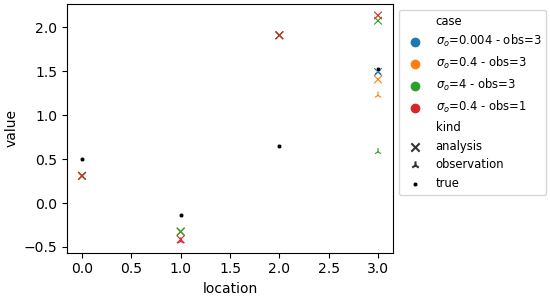

In [29]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(5.5, 3))
markers = {"analysis": "x", "observation": "2", "background": "4"}
sizes = {"analysis": 10, "observation": 10}
sns.scatterplot(data=df_q31[~df_q31['kind'].isin(columns_to_remove)], x='location', y='value', hue='case', style='kind', s=30, linewidth=0.8, markers=markers, sizes=sizes)
sns.scatterplot(data=df_q31[(df_q31['kind'].isin(['true'])) & (df_q31['case'].isin([r'$\sigma_o$=0.4 - obs=3']))], x='location', y='value', color='k', s=10, label='true')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize='small')
plt.savefig('q31.png', dpi=300)

# Q3.2

In [30]:
# Q3.2
# We now see the observation obtained on one specific grid point being useful for other grid points
results_q32a = statistical_analysis(sigma0=1.0, locations=(2,), btype='diagonal', sigmaB=0.8, correlation_length=1.0, plot=False)
results_q32b = statistical_analysis(sigma0=1.0, locations=(2,), btype='soar', sigmaB=0.8, correlation_length=1.0, plot=False)

df_q32 = create_df([results_q32a, results_q32b], ['diagonal', 'SOAR'])

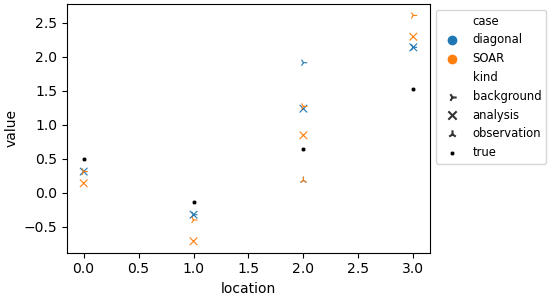

In [31]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(5.5, 3))
markers = {"analysis": "x", "observation": "2", "background": "4"}
sizes = {"analysis": 10, "observation": 10}
sns.scatterplot(data=df_q32[~df_q32['kind'].isin( ['true', rel_err_a_name, rel_err_b_name, rel_err_obs_name])], x='location', y='value', hue='case', style='kind', s=30, linewidth=0.8, markers=markers, sizes=sizes)
sns.scatterplot(data=df_q32[(df_q32['kind'].isin(['true'])) & (df_q32['case'].isin(['diagonal']))], x='location', y='value', color='k', s=10, label='true')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize='small')
plt.savefig('q32.png', dpi=300)

# Q3.3

In [41]:
# Q3.3
# results_q33_ = statistical_analysis(sigma0=1.0, locations=(2,), btype='diagonal', sigmaB=1.0, plot=False)
results_q33a = statistical_analysis(sigma0=1.0, locations=(2,), btype='soar', sigmaB=1.0, correlation_length=0.1, plot=False)
results_q33b = statistical_analysis(sigma0=1.0, locations=(2,), btype='soar', sigmaB=1.0, correlation_length=1.0, plot=False)
results_q33c = statistical_analysis(sigma0=1.0, locations=(2,), btype='soar', sigmaB=1.0, correlation_length=10.0, plot=False)
results_q33d = statistical_analysis(sigma0=1.0, locations=(2,), btype='soar', sigmaB=0.1, correlation_length=1.0, plot=False)
results_q33e = statistical_analysis(sigma0=1.0, locations=(2,), btype='soar', sigmaB=2, correlation_length=1.0, plot=False)

df_q33a = create_df([results_q33a, results_q33b, results_q33c], [r'$\sigma_b$=1.0 ; L=0.1', r'$\sigma_b$=1.0 ; L=1.0', r'$\sigma_b$=1.0 ; L=10'])
df_qq3b = create_df([results_q33d, results_q33b, results_q33e], [r'$\sigma_b$=0.1 ; L=1.0', r'$\sigma_b$=1.0 ; L=1.0', r'$\sigma_b$=2.0 ; L=1.0'])


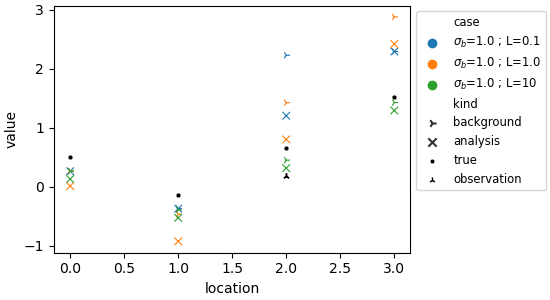

In [47]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(5.5, 3))
markers = {"analysis": "x", "observation": "2", "background": "4"}

sizes = {"analysis": 10, "observation": 10, "background":10}
sns.scatterplot(data=df_q33a[~df_q33a['kind'].isin(['true', 'observation', rel_err_a_name, rel_err_b_name, rel_err_obs_name])], x='location', y='value', hue='case', style='kind', s=30, linewidth=0.8, markers=markers, sizes=sizes)
sns.scatterplot(data=df_q33a[(df_q33a['kind'].isin(['true']))], x='location', y='value', color='k', s=10, label='true')
sns.scatterplot(data=df_q33a[(df_q33a['kind'].isin(['observation']))], x='location', y='value', color='k', s=20, linewidth=1.0, label='observation', marker='2')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize='small')
plt.savefig('q33a.png', dpi=300)

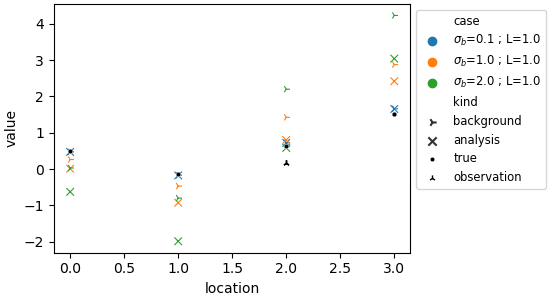

In [48]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(5.5, 3))
markers = {"analysis": "x", "observation": "2", "background": "4"}

sizes = {"analysis": 10, "observation": 10, "background":10}
sns.scatterplot(data=df_qq3b[~df_qq3b['kind'].isin(['true', 'observation', rel_err_a_name, rel_err_b_name, rel_err_obs_name])], x='location', y='value', hue='case', style='kind', s=30, linewidth=0.8, markers=markers, sizes=sizes)
sns.scatterplot(data=df_qq3b[(df_qq3b['kind'].isin(['true']))], x='location', y='value', color='k', s=10, label='true')
sns.scatterplot(data=df_q33a[(df_q33a['kind'].isin(['observation']))], x='location', y='value', color='k', s=20, linewidth=1.0, label='observation', marker='2')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize='small')
plt.savefig('q33b.png', dpi=300)

# Q4.1

```python
return {
    'relative_err_xb': err_b,
    'relative_err_xa': err_a,
    'xt': xt,
    'xb': xb,
    'y': y,
    'inds_obs': space_inds_obs,
    'xa': xa,
    'b_kind': b_kind,
    'length_scale': length_scale,
    'smoothing': smoothing,
    'b_sigma': sigma_b
}
```

In [ ]:
def get_name(results):
    if(results['b_kind']=='diagonal'):
        return f"{results['b_kind']}"
    return f"{results['b_kind']} - D={results['length_scale']}"

In [ ]:
results_q41a = threedvar_analysis(b_kind='diagonal', sigma_b=0.8, length_scale=10, 
                                  smoothing=4, sigmaR=2.0, verbose=False, plot=False)
results_q41ab = threedvar_analysis(b_kind='diffusion', sigma_b=0.8, length_scale=0.1, smoothing=4, sigmaR=2.0, verbose=False, plot=False)
results_q41b = threedvar_analysis(b_kind='diffusion', sigma_b=0.8, length_scale=1, smoothing=4, sigmaR=2.0, verbose=False, plot=False)
results_q41c = threedvar_analysis(b_kind='diffusion', sigma_b=0.8, length_scale=10, smoothing=4, sigmaR=2.0, verbose=False, plot=False)

In [ ]:
names = [
    get_name(results_q41a),
    get_name(results_q41ab),
    get_name(results_q41b),
    get_name(results_q41c)
]
df_q41 = create_df([results_q41a, results_q41ab, results_q41b, results_q41c], names)

In [ ]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(5.5, 3))
# markers = {"analysis": "x", "observation": "2"}
# sizes = {"analysis": 30, "observation": 30}
sns.lineplot(data=df_q41[~df_q41['kind'].isin(['analysis', 'background', 'true', 'observation', rel_err_a_name, rel_err_obs_name])], x='location', y='value', hue='case', linewidth=1.0) # markers=markers, sizes=sizes)
# sns.lineplot(data=df_q41[(df_q41['kind'].isin(['true']))], x='location', y='value', color='k', label='true', linewidth=0.2, linestyle='-.')
# sns.lineplot(data=df_q41[(df_q41['kind'].isin(['observation']))], x='location', y='value', color='r', label='observation', linewidth=0.2, linestyle='-.')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize='small')
ax.set_ylabel(r'$\frac{x^t_i - x_{b,i}}{\|x^t_i\|}$, $i$ the location')
plt.savefig('q41.png', dpi=300);

# Q4.2

In [ ]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(5.5, 3))
sns.lineplot(data=df_q41[~df_q41['kind'].isin(['analysis', 'background', 'true', 'observation', rel_err_b_name, rel_err_obs_name])],
             x='location', y='value', hue='case', linewidth=1.0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize='small')
ax.set_ylabel(r'$\frac{x^t_i - x_{a,i}}{\|x^t_i\|}$, $i$ the location')
plt.savefig('q42a.png', dpi=300);

In [ ]:
def get_name_q42(results):
    if(results['b_kind']=='diagonal'):
        return f"{results['b_kind']} - obs={results['total_space_obs']}"
    return  r"$\sigma_b$" + f"={results['b_sigma']} - obs={results['total_space_obs']} - D={results['length_scale']}" # f"{results['b_kind']} - " +

In [ ]:
results_q42a = threedvar_analysis(b_kind='diffusion', sigma_b=0.8, length_scale=2, smoothing=4, total_space_obs=5, sigmaR=2.0, verbose=False, plot=False)
results_q42b = threedvar_analysis(b_kind='diffusion', sigma_b=2.0, length_scale=2, smoothing=4, total_space_obs=5, sigmaR=2.0, verbose=False, plot=True)
results_q42c = threedvar_analysis(b_kind='diffusion', sigma_b=5.0, length_scale=2, smoothing=4, total_space_obs=5, sigmaR=2.0, verbose=False, plot=False)

names = [
    get_name_q42(results_q42a),
    get_name_q42(results_q42b),
    get_name_q42(results_q42c)
]
df_q42 = create_df([results_q42a, results_q42b, results_q42c], names)

In [ ]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(5.5, 3))
sns.lineplot(data=df_q42[~df_q42['kind'].isin(['analysis', 'background', 'true', 'observation', rel_err_b_name, rel_err_obs_name])],
             x='location', y='value', hue='case', linewidth=1.0)
sns.scatterplot(data=df_q42[(df_q42['kind'].isin([rel_err_obs_name]))], x='location', y='value', color='r', label=r'$\frac{x^t_i - y_i}{\|x^t_i\|}$', linewidth=0.0)
ax.set_ylabel(r'$\frac{x^t_i - x_{a,i}}{\|x^t_i\|}$, $i$ the location')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize='small')
plt.savefig('q42b.png', dpi=300);

# Q4.3

In [ ]:
from functools import partial
q43_func = partial(threedvar_analysis, b_kind='diffusion', sigma_b=1.0, smoothing=4, total_space_obs=5, sigmaR=2.0, verbose=False, plot=False)

ll = []
lengths = [0.1, 0.5, 1., 3, 5, 7, 10, 15, 20]
for length in lengths:
    ll.append(q43_func(length_scale=length))

# results_q43a = threedvar_analysis(b_kind='diffusion', sigma_b=1.0, length_scale=1, smoothing=4, total_space_obs=5, sigmaR=2.0, verbose=False, plot=False)
# results_q43b = threedvar_analysis(b_kind='diffusion', sigma_b=1.0, length_scale=5, smoothing=4, total_space_obs=5, sigmaR=2.0, verbose=False, plot=False)
# results_q43c = threedvar_analysis(b_kind='diffusion', sigma_b=1.0, length_scale=10, smoothing=4, total_space_obs=5, sigmaR=2.0, verbose=False, plot=False)
# results_q43d = threedvar_analysis(b_kind='diffusion', sigma_b=1.0, length_scale=10, smoothing=4, total_space_obs=5, sigmaR=2.0, verbose=False, plot=False)

names = [get_name_q42(l) for l in ll]
df_q43 = create_df(ll, names)


In [ ]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(4,3))
sns.lineplot(x=lengths, y=df_q43[df_q43['kind']==rel_err_b_name].groupby('case').std()['value'].sort_values(ascending=False).values, marker='X')
ax.set_xlabel('D')
ax.set_ylabel(r'$\sigma(\frac{x^t - x_{b}}{\|x^t\|})$');
plt.savefig('q43a1.png', dpi=300);

In [ ]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(4,3))
sns.lineplot(x=lengths, y=df_q43[df_q43['kind']==rel_err_a_name].groupby('case').std()['value'].sort_values(ascending=False).values, marker='X')
ax.set_xlabel('D')
ax.set_ylabel(r'$\sigma(\frac{x^t - x_{a}}{\|x^t\|})$');
plt.savefig('q43a2.png', dpi=300);

In [ ]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(5.5, 3))
sns.lineplot(data=df_q43[~df_q43['kind'].isin(['analysis', 'background', 'true', 'observation', rel_err_b_name, rel_err_obs_name])],
             x='location', y='value', hue='case', linewidth=0.5)
sns.scatterplot(data=df_q43[(df_q43['kind'].isin([rel_err_obs_name]))], x='location', y='value', color='r', label=r'$\frac{x^t_i - y_i}{\|x^t_i\|}$', linewidth=0.0)
ax.set_ylabel(r'$\frac{x^t_i - x_{a,i}}{\|x^t_i\|}$, $i$ the location')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize='small')
plt.savefig('q43a3.png', dpi=300);

In [ ]:
def get_name_q43b(results):
    if(results['b_kind']=='diagonal'):
        return f"{results['b_kind']} - obs={results['total_space_obs']}"
    return  f"M={results['smoothing']}" # f"{results['b_kind']} - " +

In [ ]:
from functools import partial
q43_func_smooth = partial(threedvar_analysis, b_kind='diffusion', sigma_b=1.0, length_scale=10, total_space_obs=5, sigmaR=2.0, verbose=False, plot=False)

ll = []
smooths = [2, 3, 5, 7, 10, 15, 20]
for smooth in smooths:
    ll.append(q43_func_smooth(smoothing=smooth))

# results_q43a = threedvar_analysis(b_kind='diffusion', sigma_b=1.0, length_scale=1, smoothing=4, total_space_obs=5, sigmaR=2.0, verbose=False, plot=False)
# results_q43b = threedvar_analysis(b_kind='diffusion', sigma_b=1.0, length_scale=5, smoothing=4, total_space_obs=5, sigmaR=2.0, verbose=False, plot=False)
# results_q43c = threedvar_analysis(b_kind='diffusion', sigma_b=1.0, length_scale=10, smoothing=4, total_space_obs=5, sigmaR=2.0, verbose=False, plot=False)
# results_q43d = threedvar_analysis(b_kind='diffusion', sigma_b=1.0, length_scale=10, smoothing=4, total_space_obs=5, sigmaR=2.0, verbose=False, plot=False)

names = [get_name_q43b(l) for l in ll]
df_q43_smooth = create_df(ll, names)

In [ ]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(4,3))
sns.lineplot(x=smooths, y=df_q43_smooth[df_q43_smooth['kind']==rel_err_b_name].groupby('case').std()['value'].sort_values(ascending=False).values, marker='X')
ax.set_xlabel('M')
ax.set_ylabel(r'$\sigma(\frac{x^t - x_{b}}{\|x^t\|})$');
plt.savefig('q43b1.png', dpi=300);

In [ ]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(4,3))
sns.lineplot(x=smooths, y=df_q43_smooth[df_q43_smooth['kind']==rel_err_a_name].groupby('case').std()['value'].sort_values(ascending=False).values, marker='X')
ax.set_xlabel('M')
ax.set_ylabel(r'$\sigma(\frac{x^t - x_{a}}{\|x^t\|})$');
plt.savefig('q43b2.png', dpi=300);

In [ ]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(5.5, 3))
sns.lineplot(data=df_q43_smooth[~df_q43_smooth['kind'].isin(['analysis', 'background', 'true', 'observation', rel_err_b_name, rel_err_obs_name])],
             x='location', y='value', hue='case', linewidth=0.5)
sns.scatterplot(data=df_q43_smooth[(df_q43_smooth['kind'].isin([rel_err_obs_name]))], x='location', y='value', color='r', label=r'$\frac{x^t_i - y_i}{\|x^t_i\|}$', linewidth=0.0)
ax.set_ylabel(r'$\frac{x^t_i - x_{a,i}}{\|x^t_i\|}$, $i$ the location')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize='small')
plt.savefig('q43b3.png', dpi=300);

# Q5

In [4]:
# a
results_q5a = fourdvar_analysis(n=100, nt=10, b_kind='diffusive', D=5, M=4, f_obs_time=10, f_obs_space=30, sigma_obs=1e-2, max_outer=10, max_inner=500, precond='B', verbose=True, plot=False) # F='B


iter   CGiter         f(x)           ||grad(x)||
0        0        1528497.80          532195.87
1        308      29413.86            98033.00 
2        330      459.30              6196.00  
3        352      293.66              50.47    
4        364      293.60              0.50     
5        381      293.60              0.02     
6        379      293.60              0.00     
7        385      293.60              0.00     
8        383      293.60              0.00     
9        380      293.60              0.00     

||xt - xb||_2 / ||xt||_2 =  0.14583095429190757
||xt - xa||_2 / ||xt||_2 =  0.0026227368076977365


In [5]:
# b
results_q5b = fourdvar_analysis(n=100, nt=10, b_kind='diffusive', D=5, M=4, f_obs_time=5, f_obs_space=10, sigma_obs=1e-2, max_outer=10, max_inner=500, precond='B', verbose=True, plot=False) # F='B


iter   CGiter         f(x)           ||grad(x)||
0        0        274424.29           121177.17
1        84       364.57              3620.54  
2        92       40.95               111.03   
3        90       40.68               0.19     
4        96       40.68               0.01     
5        91       40.68               0.00     
6        91       40.68               0.00     
7        92       40.68               0.00     
8        91       40.68               0.00     
9        91       40.68               0.00     

||xt - xb||_2 / ||xt||_2 =  0.14583095429190757
||xt - xa||_2 / ||xt||_2 =  0.024410051218800112


In [6]:
results_q5c = fourdvar_analysis(n=100, nt=10, b_kind='diffusive', D=5, M=4, f_obs_time=5, f_obs_space=10, sigma_obs=1e-4, max_outer=10, max_inner=500, precond='B', verbose=True, plot=False) # F='B


iter   CGiter         f(x)           ||grad(x)||
0        0        2729087682.75       1207092429.11
1        275      58652780.48         144980413.46
2        422      18106925.89         75572532.29
3        418      541543.52           8414273.96
4        465      1398.93             784869.33
5        408      45.82               829.10   
6        477      45.81               2.40     
7        499      45.81               0.00     
8        499      45.81               0.00     
9        499      45.81               0.00     

||xt - xb||_2 / ||xt||_2 =  0.14583095429190757
||xt - xa||_2 / ||xt||_2 =  0.006882911213161232


In [7]:
results_q5a['y'] = results_q5a['y'][:len(results_q5a['inds_obs'])]
results_q5b['y'] = results_q5b['y'][:len(results_q5b['inds_obs'])]
results_q5c['y'] = results_q5c['y'][:len(results_q5c['inds_obs'])]

In [8]:
print(np.linalg.norm(results_q5a['xt'] - results_q5a['xa']))
print(np.linalg.norm(results_q5b['xt'] - results_q5b['xa']))
print(np.linalg.norm(results_q5c['xt'] - results_q5c['xa']))

0.11179395626996137
1.0404765703111125
0.29338356518114367


In [9]:
ll = [results_q5a, results_q5b, results_q5c]
names = [r'$f_{time}=10$ - $f_{space}=30$ - $\sigma_o =0.01$', r'$f_{time}=5$ - $f_{space}=10$ - $\sigma_o =0.01$', r'$f_{time}=5$ - $f_{space}=10$ - $\sigma_o =1e-4$']
df_q5 = create_df(ll, names)

# Q6

In [52]:
results_q6a = fourdvar_analysis(n=100, nt=10, b_kind='diffusive', D=5, M=4, f_obs_time=10, f_obs_space=30, sigma_obs=1e-4, max_outer=5, max_inner=200, precond='B', verbose=True, plot=False)
results_q6b = fourdvar_analysis(n=100, nt=10, b_kind='diffusive', D=5, M=4, f_obs_time=10, f_obs_space=30, sigma_obs=1e-4, max_outer=10, max_inner=100, precond='B', verbose=True, plot=False)


iter   CGiter         f(x)           ||grad(x)||
0        0        15305549734.21      5326196336.16
1        199      293039986.60        988188585.74
2        199      2303870.81          62315565.16
3        199      182983.99           2418547.10
4        199      72367.74            1526784.87

||xt - xb||_2 / ||xt||_2 =  0.14583095429190757
||xt - xa||_2 / ||xt||_2 =  0.0035654023484431117

iter   CGiter         f(x)           ||grad(x)||
0        0        15305549734.21      5326196336.16
1        99       285955930.14        975090176.32
2        99       2264256.81          61918336.43
3        99       159744.36           3752734.79
4        99       53516.42            2762901.56
5        99       22401.18            1051384.34
6        99       11416.73            1022616.41
7        99       7140.23             445709.64
8        99       5179.42             496114.51
9        99       4161.31             258470.61

||xt - xb||_2 / ||xt||_2 =  0.14583095429190757
||xt - x

In [53]:
print(np.linalg.norm(results_q6a['xt'] - results_q6a['xa']))
print(np.linalg.norm(results_q6b['xt'] - results_q6b['xa']))

0.1519750030032763
0.059418579619777596


# Q7

In [12]:
results_q7a = fourdvar_analysis(n=100, nt=10, b_kind='diffusive', D=5, M=4, f_obs_time=5, f_obs_space=10, sigma_obs=1e-2, max_outer=10, max_inner=500, precond='B', verbose=True, plot=False)
results_q7b = fourdvar_analysis(n=100, nt=10, b_kind='diffusive', D=5, M=4, f_obs_time=5, f_obs_space=10, sigma_obs=1e-2, max_outer=10, max_inner=500, precond='I', verbose=True, plot=False)


iter   CGiter         f(x)           ||grad(x)||
0        0        274424.29           121177.17
1        84       364.57              3620.54  
2        92       40.95               111.03   
3        90       40.68               0.19     
4        96       40.68               0.01     
5        91       40.68               0.00     
6        91       40.68               0.00     
7        92       40.68               0.00     
8        91       40.68               0.00     
9        91       40.68               0.00     

||xt - xb||_2 / ||xt||_2 =  0.14583095429190757
||xt - xa||_2 / ||xt||_2 =  0.024410051218800112

iter   CGiter         f(x)           ||grad(x)||
0        0        274424.29           121177.17
1        180      364.85              3621.86  
2        209      40.96               111.33   
3        209      40.68               0.19     
4        232      40.68               0.01     
5        229      40.68               0.00     
6        220      40.68           

In [13]:
print(np.linalg.norm(results_q7a['xt'] - results_q7a['xa']))
print(np.linalg.norm(results_q7b['xt'] - results_q7b['xa']))

1.0404765703111125
1.0404765701750975


In [14]:
print(results_q5a['total_number_of_inner_iterations'])
print(results_q5b['total_number_of_inner_iterations'])
print(results_q5c['total_number_of_inner_iterations'])
print(results_q6a['total_number_of_inner_iterations'])
print(results_q6b['total_number_of_inner_iterations'])
print(results_q7a['total_number_of_inner_iterations'])
print(results_q7b['total_number_of_inner_iterations'])


3262
818
4461
995
990
818
1919
